In [28]:
#Import the Necessary libraries
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf

In [29]:
#Import the dataset
df = pd.read_csv(r"C:\Users\jwh28\Downloads\Time-Wasters on Social Media.csv")
print("Number of rows:", df.shape[0])

Number of rows: 1000


In [30]:
#Delete Unnecessary columns
df.drop(['Video ID', 'Watch Time', 'UserID'], axis=1, inplace=True)
print("Number of rows:", df.shape[0])

Number of rows: 1000


In [31]:
#Investigate Column Types
bool_cols = [
    col for col in df.columns
    if set(df[col].dropna().unique()) <= {True, False}
]
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [
    col for col in df.columns
    if col not in bool_cols + numeric_cols
]
print("Boolean columns:", bool_cols)
print("Numerical columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Boolean columns: ['Debt', 'Owns Property']
Numerical columns: ['Age', 'Income', 'Total Time Spent', 'Number of Sessions', 'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level']
Categorical columns: ['Gender', 'Location', 'Profession', 'Demographics', 'Platform', 'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS', 'CurrentActivity', 'ConnectionType']


In [32]:
#Convert Boolean columns to integers
df[bool_cols] = df[bool_cols].astype(int)

for col in bool_cols:
    df[col] = df[col].astype(int)

print("Number of rows:", df.shape[0])


Number of rows: 1000


In [33]:
#Investigate Categorical Columns:
for col in categorical_cols:
    unique_vals = df[col].dropna().unique()
    print(f"Unique values in '{col}': {list(unique_vals)}")


Unique values in 'Gender': ['Male', 'Female', 'Other']
Unique values in 'Location': ['Pakistan', 'Mexico', 'United States', 'Barzil', 'Vietnam', 'India', 'Indonesia', 'Philippines', 'Japan', 'Germany']
Unique values in 'Profession': ['Engineer', 'Artist', 'Waiting staff', 'Manager', 'driver', 'Students', 'Labor/Worker', 'Cashier', 'Teacher']
Unique values in 'Demographics': ['Rural', 'Urban']
Unique values in 'Platform': ['Instagram', 'Facebook', 'YouTube', 'TikTok']
Unique values in 'Video Category': ['Pranks', 'Vlogs', 'Gaming', 'Jokes/Memes', 'Entertainment', 'ASMR', 'Life Hacks', 'Trends', 'Comedy']
Unique values in 'Frequency': ['Night', 'Afternoon', 'Evening', 'Morning']
Unique values in 'Watch Reason': ['Procrastination', 'Habit', 'Entertainment', 'Boredom']
Unique values in 'DeviceType': ['Smartphone', 'Computer', 'Tablet']
Unique values in 'OS': ['Android', 'iOS', 'MacOS', 'Windows']
Unique values in 'CurrentActivity': ['Commuting', 'At school', 'At home', 'At work']
Unique va

In [34]:
#Configure the Frequency Column

categorical_cols.remove('Frequency')

frequency_mapping = {
    'Morning':   0,
    'Afternoon': 1,
    'Evening':   2,
    'Night':     3
}

df['Frequency'] = df['Frequency'].map(frequency_mapping)


In [35]:
#Change "Barzil" to "Brazil" in the 'Location' column
df.loc[df['Location'] == 'Barzil', 'Location'] = 'Brazil'
print(df["Location"].unique())
print("Number of rows:", df.shape[0])


['Pakistan' 'Mexico' 'United States' 'Brazil' 'Vietnam' 'India'
 'Indonesia' 'Philippines' 'Japan' 'Germany']
Number of rows: 1000


In [36]:
#Create dummy variables for categorical columns
for col in categorical_cols:
    dummies = pd.get_dummies(
        df[col],
        prefix=col,
        drop_first=True,    # ← drop one dummy to avoid the trap
        dtype=int
    )
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
    
print("Number of rows:", df.shape[0])
print(f"Column names: {list(df.columns)}, Number of columns: {df.shape[1]}")


Number of rows: 1000
Column names: ['Age', 'Income', 'Debt', 'Owns Property', 'Total Time Spent', 'Number of Sessions', 'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level', 'Gender_Male', 'Gender_Other', 'Location_Germany', 'Location_India', 'Location_Indonesia', 'Location_Japan', 'Location_Mexico', 'Location_Pakistan', 'Location_Philippines', 'Location_United States', 'Location_Vietnam', 'Profession_Cashier', 'Profession_Engineer', 'Profession_Labor/Worker', 'Profession_Manager', 'Profession_Students', 'Profession_Teacher', 'Profession_Waiting staff', 'Profession_driver', 'Demographics_Urban', 'Platform_Instagram', 'Platform_TikTok', 'Platform_YouTube', 'Video Category_Comedy', 'Video Category_Entertainment', 'Video Category_Gaming', 'Video Category_Jokes/Memes', 'Video Category_Life Hacks', 'Video Category_Pranks', 'Video Category_Trends',

In [37]:
#Ensure there are no missing values
df.isnull().values.any()

False

In [38]:
#Convert to CSV
df.to_csv(r"C:\Users\jwh28\Downloads\Processed_Data_Linear_Regression.csv", index=False)

In [39]:
#Build OLS Model to Predict Addiction Level
X = df.drop("Addiction Level", axis=1)
y = df["Addiction Level"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model.drop("Addiction Level", axis=1)
y_model = data_model["Addiction Level"]

X_model = sm.add_constant(X_model)

model = sm.OLS(y_model, X_model).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Addiction Level   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.743e+25
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:35:50   Log-Likelihood:                 25753.
No. Observations:                1000   AIC:                        -5.139e+04
Df Residuals:                     941   BIC:                        -5.110e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [40]:
#Address Multicollinearity
X = sm.add_constant(df.drop("Addiction Level", axis=1))

vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

high_vif = vif_data[vif_data["VIF"] > 5]
print("Features with VIF > 5:")
print(high_vif)

to_drop = high_vif.loc[high_vif["feature"] != "const", "feature"].tolist()
df.drop(columns=to_drop, inplace=True)

c:\Users\jwh28\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\jwh28\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with VIF > 5:
             feature         VIF
14  ProductivityLoss         inf
15      Satisfaction         inf
16      Self Control  104.911208


In [41]:
#Refit OLS Model
X = df.drop("Addiction Level", axis=1)
y = df["Addiction Level"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model.drop("Addiction Level", axis=1)
y_model = data_model["Addiction Level"]

X_model = sm.add_constant(X_model)

model_reduced = sm.OLS(y_model, X_model).fit()

print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:        Addiction Level   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     8.444
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           2.87e-52
Time:                        16:35:50   Log-Likelihood:                -1937.2
No. Observations:                1000   AIC:                             3988.
Df Residuals:                     943   BIC:                             4268.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [42]:
#Address Multicollinearity again
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

high_vif = vif_data[vif_data["VIF"] > 5]
print("Features with VIF > 5:")
print(high_vif)

to_drop = high_vif.loc[high_vif["feature"] != "const", "feature"].tolist()
df.drop(columns=to_drop, inplace=True)

Features with VIF > 5:
                  feature        VIF
0                     Age   9.899367
1                  Income  26.775847
2                    Debt   9.497674
28    Profession_Students   5.425586
47  DeviceType_Smartphone   5.595866


In [43]:
#Refit OLS Model again
X = df.drop("Addiction Level", axis=1)
y = df["Addiction Level"]

data_model = pd.concat([X, y], axis=1).dropna()
X_model = data_model.drop("Addiction Level", axis=1)
y_model = data_model["Addiction Level"]

X_model = sm.add_constant(X_model)

model_reduced = sm.OLS(y_model, X_model).fit()

print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:        Addiction Level   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9.154
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.48e-53
Time:                        16:35:51   Log-Likelihood:                -1940.2
No. Observations:                1000   AIC:                             3984.
Df Residuals:                     948   BIC:                             4240.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [44]:
#Address Multicollinearity again
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

high_vif = vif_data[vif_data["VIF"] > 5]
print("Features with VIF > 5:")
print(high_vif)

to_drop = high_vif.loc[high_vif["feature"] != "const", "feature"].tolist()
df.drop(columns=to_drop, inplace=True)

Features with VIF > 5:
Empty DataFrame
Columns: [feature, VIF]
Index: []


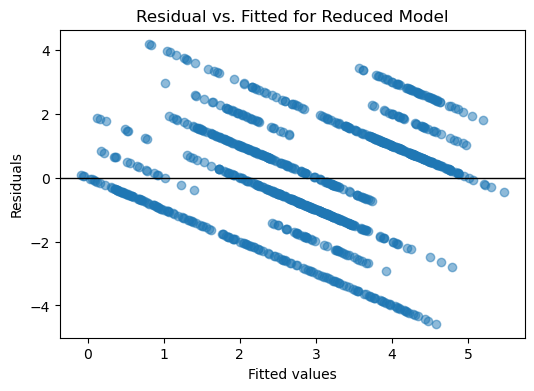

In [45]:
#Check for other violated Linear Regression assumptions
fitted = model_reduced.fittedvalues
resid  = model_reduced.resid

plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual vs. Fitted for Reduced Model")
plt.show()

In [46]:
#Feature Selection using Backward Elimination
X = df.drop("Addiction Level", axis=1)
y = df["Addiction Level"]
data = pd.concat([X, y], axis=1).dropna()
X = data.drop("Addiction Level", axis=1)
y = data["Addiction Level"]

features = X.columns.tolist()

while True:
    X_model = sm.add_constant(X[features])
    model = sm.OLS(y, X_model).fit()

    pvals = model.pvalues.drop("const")

    max_p = pvals.max()
    if max_p > 0.05:
        worst_feature = pvals.idxmax()
        features.remove(worst_feature)
    else:
        break

X_final = sm.add_constant(X[features])
final_model = sm.OLS(y, X_final).fit()
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:        Addiction Level   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     210.8
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           4.47e-77
Time:                        16:35:52   Log-Likelihood:                -1964.1
No. Observations:                1000   AIC:                             3934.
Df Residuals:                     997   BIC:                             3949.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9875      0

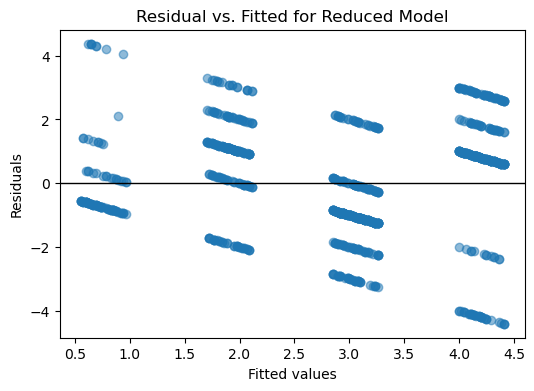

In [47]:
#Final Model Residual Plot
fitted = final_model.fittedvalues
resid  = final_model.resid

plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual vs. Fitted for Reduced Model")
plt.show()